In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import os
import re
import fnmatch
import sklearn

from numpy import genfromtxt
from pandas import DataFrame
import numpy as np
from imblearn.under_sampling import NearMiss

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/NN/")
!ls

Interpolated		   subject_009_01__y_prediction.csv  TestData
Interpolated_combined.csv  subject_010_01__y_prediction.csv  TrainingData
ProcessData		   subject_011_01__y_prediction.csv
Subject			   subject_012_01__y_prediction.csv


In [ ]:
# Set the file paths for training and test data
train_data_path = "TrainingData"
test_data_path = "TestData"

# Define a function to filter file names
def filter_files(path, pattern):
    return fnmatch.filter(os.listdir(path), pattern)

# Group training data file names into lists
listy = filter_files(train_data_path, '*x.csv')[1:]
Files_x = filter_files(train_data_path, '*x.csv')
Files_x_time = filter_files(train_data_path, '*x_time.csv')
Files_y = filter_files(train_data_path, '*y.csv')
Files_y_time = filter_files(train_data_path, '*y_time.csv')

# Group test data file names into lists
listz = os.listdir(test_data_path)
Test_Files_x = filter_files(test_data_path, '*x.csv')
Test_Files_x_time = filter_files(test_data_path, '*x_time.csv')
Test_Files_y_time = filter_files(test_data_path, '*y_time.csv')

# Print the Files_x list
print(Files_x)


['subject_001_01__x.csv', 'subject_001_06__x.csv', 'subject_001_03__x.csv', 'subject_001_05__x.csv', 'subject_001_08__x.csv', 'subject_001_04__x.csv', 'subject_001_07__x.csv', 'subject_002_01__x.csv', 'subject_002_05__x.csv', 'subject_002_04__x.csv', 'subject_002_03__x.csv', 'subject_002_02__x.csv', 'subject_001_02__x.csv', 'subject_003_01__x.csv', 'subject_003_03__x.csv', 'subject_003_02__x.csv', 'subject_004_01__x.csv', 'subject_004_02__x.csv', 'subject_005_02__x.csv', 'subject_005_03__x.csv', 'subject_005_01__x.csv', 'subject_006_01__x.csv', 'subject_006_02__x.csv', 'subject_006_03__x.csv', 'subject_007_01__x.csv', 'subject_007_02__x.csv', 'subject_007_03__x.csv', 'subject_007_04__x.csv', 'subject_008_01__x.csv']


In [ ]:
# Set the file path for training data
train_data_path = "/content/gdrive/My Drive/NN/TrainingData/"

# Define a function to filter file names
def filter_files(path, pattern):
    return fnmatch.filter(os.listdir(path), pattern)

# Group training data file names into lists
listy = filter_files(train_data_path, '*x.csv')[1:]
Files_x = filter_files(train_data_path, '*x.csv')

# Create a sorted set of file names based on the first 14 characters
files = sorted(set([x[:14] for x in Files_x]))

# Create an empty dataframe to store the merged data
master_data = pd.DataFrame()
master_data_y = pd.DataFrame()

# Loop through each file and merge the x and y data
for file in files:
    # Set the file paths for the x and y data
    file_x = train_data_path + file + "__x.csv"
    file_y = train_data_path + file + "__y.csv"
    file_x_time = train_data_path + file + "__x_time.csv"
    file_y_time = train_data_path + file + "__y_time.csv"

    # Read in the x and y data
    y_data = pd.read_csv(file_y, names=["label"])
    y_time = pd.read_csv(file_y_time, names=["y_time"])
    x_data = pd.read_csv(file_x, names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
    x_time = pd.read_csv(file_x_time, names=["x_time"])

    # Merge the x and y data on time and interpolate missing values
    x_data["time"] = x_time["x_time"]    
    y_data["time"] = y_time["y_time"]    
    data = x_data.merge(y_data, how="outer", on="time")
    data.sort_values("time", inplace=True)
    data["label"] = data["label"].fillna(method="bfill").fillna(method="ffill")
    data = data.interpolate()

    # Add the subject and append the data to the master dataframe
    data["subject"] = file
    y_data["subject"] = file
    master_data = master_data.append(data)
    master_data_y = master_data_y.append(data)

# Set the index of the master dataframe
master_data.set_index(["subject", "time"], inplace=True)
master_data_y.set_index(["subject", "time"], inplace=True)

# Print the length of the master dataframe
print(len(master_data))


<ipython-input-120-1478d9b15bf0>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_data = master_data.append(data)
<ipython-input-120-1478d9b15bf0>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_data_y = master_data_y.append(data)
<ipython-input-120-1478d9b15bf0>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_data = master_data.append(data)
<ipython-input-120-1478d9b15bf0>:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_data_y = master_data_y.append(data)
<ipython-input-120-1478d9b15bf0>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

1677059


In [ ]:
master_data.head(20)

accr_x    accr_y    accr_z     gyr_x     gyr_y  \
subject        time                                                      
subject_001_01 0.000  4.435275  8.196063  2.974488  0.014215 -0.039157   
               0.020  4.311097  8.270259  2.941273  0.009993 -0.021818   
               0.025  4.186920  8.344455  2.908057  0.005771 -0.004480   
               0.050  4.544637  8.408659  2.890000  0.007967  0.022412   
               0.075  4.849308  8.411614  2.900692  0.027778 -0.010670   
               0.100  4.509190  8.118649  2.847298  0.021577 -0.045498   
               0.120  4.367852  8.196228  2.849520  0.017055 -0.022526   
               0.125  4.226515  8.273807  2.851742  0.012534  0.000445   
               0.150  4.532063  8.398341  2.856682  0.014484  0.028769   
               0.175  4.433669  8.294719  2.823521  0.016340 -0.029434   
               0.200  4.160676  8.260676  2.827568  0.011222 -0.016748   
               0.220  4.296720  8.266644  2.808809  0.004253  0.003173   
               0.225  4.432763  8.272613  2.790050 -0.002715  0.023094   
               0.250  4.511362  8.256774  2.820538 -0.002248  0.001547   
               0.275  4.098018  8.154184  2.901101 -0.010418 -0.042853   
               0.300  3.931769  8.203628  2.958186 -0.015232 -0.006177   
               0.320  4.228047  8.325295  2.916271 -0.009335  0.015066   
               0.325  4.524325  8.446963  2.874356 -0.003438  0.036310   
               0.350  4.615744  8.385348  2.782674 -0.002790  0.012677   
               0.375  4.392814  8.239121  2.830176  0.001527  0.015576   

                         gyr_z  label  
subject        time                    
subject_001_01 0.000 -0.016744    0.0  
               0.020 -0.010045    0.0  
               0.025 -0.003345    0.0  
               0.050  0.001159    0.0  
               0.075 -0.014223    0.0  
               0.100 -0.021111    0.0  
               0.120 -0.018970    0.0  
               0.125 -0.016830    0.0  
               0.150 -0.011091    0.0  
               0.175 -0.008998    0.0  
               0.200 -0.006027    0.0  
               0.220  0.003098    0.0  
               0.225  0.012222    0.0  
               0.250  0.011137    0.0  
               0.275  0.005031    0.0  
               0.300  0.016877    0.0  
               0.320  0.031164    0.0  
               0.325  0.045451    0.0  
               0.350  0.054444    0.0  
               0.375  0.052817    0.0

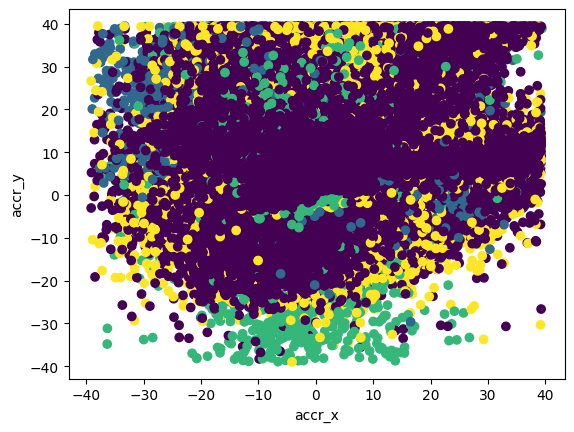

In [ ]:
import matplotlib.pyplot as plt

# select data to plot
data_to_plot = master_data[['accr_x', 'accr_y', 'label']]

# create scatter plot
plt.scatter(data_to_plot['accr_x'], data_to_plot['accr_y'], c=data_to_plot['label'], cmap='viridis')

# set axis labels
plt.xlabel('accr_x')
plt.ylabel('accr_y')

# show plot
plt.show()


In [ ]:
# get the number of rows in master_data
num_rows = len(master_data)
print("Number of rows in master_data: ", num_rows)

# count the number of occurrences of each label in the "label" column of master_data
label_counts = master_data["label"].value_counts()
print("Label counts:")
print(label_counts)


Number of rows in master_data:  1677059
Label counts:
0.0    1258659
3.0     258045
2.0      91335
1.0      69020
Name: label, dtype: int64


In [ ]:
X = master_data.drop("label", axis=1)
y = master_data["label"]

In [ ]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# define the undersampling method
undersample = RandomUnderSampler(random_state=42)

# transform the dataset
X_1, y_1 = undersample.fit_resample(X_train, y_train)


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_1,y_1)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# set random seed for reproducibility
RANDOM_STATE = 42

# define the undersampling method
undersample = RandomUnderSampler(random_state=RANDOM_STATE)

# apply the undersampling method to training data
X_undersampled, y_undersampled = undersample.fit_resample(X_train, y_train)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")

=== Confusion Matrix ===
[[233712  45807  26263 109388]
 [  1850  17078   1649   1924]
 [  1144   2220  25616   1187]
 [ 22222  10477   4581  48312]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.90      0.56      0.69    415170
         1.0       0.23      0.76      0.35     22501
         2.0       0.44      0.85      0.58     30167
         3.0       0.30      0.56      0.39     85592

    accuracy                           0.59    553430
   macro avg       0.47      0.68      0.50    553430
weighted avg       0.76      0.59      0.63    553430



=== All AUC Scores ===


In [ ]:
cd ..

/content/gdrive/MyDrive/NN


In [ ]:
cd 'TestData'

/content/gdrive/MyDrive/NN/TestData


In [ ]:
file_prefix = "subject_009_01_"
testingX_009 = pd.read_csv(file_prefix + "_x.csv", names=['accr_x', 'accr_y', 'accr_z', 'gyr_x', 'gyr_y', 'gyr_z'])
testingX_time_009 = pd.read_csv(file_prefix + "_x_time.csv", names=["x_time"])
testingY_time_009 = pd.read_csv(file_prefix + "_y_time.csv", names=["time"])
testingY_time_009.head()


,time
0,0.02
1,0.12
2,0.22
3,0.32
4,0.42


In [ ]:
x_data_test = testingX_009
y_time_test = testingY_time_009
x_data_test["time"] = x_time["x_time"]  

data = x_data_test.merge(y_time_test,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)
data.set_index(["time"], inplace = True)
data.head()

,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,0.405320,8.708449,-4.466124,0.000556,-0.005863,0.005649
0.12,0.492617,8.715558,-4.495296,0.000102,0.006652,0.006952
0.22,0.455268,8.716808,-4.487077,0.001029,0.005111,0.003036
0.32,0.464851,8.709219,-4.460000,-0.000370,0.003656,0.003656
0.42,0.458229,8.712744,-4.476527,0.002437,0.001799,0.002459


In [ ]:
import numpy as np
from google.colab import files

# Predict on the data
y_pred_009 = rfc.predict(data)

print(y_pred_009.shape)

# Read the validation data
validationX_009 = pd.read_csv("subject_009_01__y_time.csv", header=None)

# Interpolate the predicted data
interpolated_data_009 = nn_interpolate(y_pred_009, (validationX_009.shape[0], validationX_009.shape[1]))
print(interpolated_data_009.shape)

# Create a dataframe for the predicted data
sub009df = pd.DataFrame()
sub009df["y_pred"] = interpolated_data_009

# Output the value counts for the predicted data
sub009df.y_pred.value_counts()

# Save the predicted data to a file
sub009df.to_csv('subject_009_01__y_prediction.csv')

# Download the file
with open('subject_009_01__y_prediction.csv', 'r') as f:
    contents = f.read()

files.download('subject_009_01__y_prediction.csv')


(9498,)
(9498,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from google.colab import files

# Predict on the data
y_pred_009 = rfc.predict(data)
print(y_pred_009.shape)

# Read the validation data
testingY_time_009 = pd.read_csv("subject_009_01__y_time.csv", header=None)

# Interpolate the predicted data
interpolated_data_009 = nn_interpolate(y_pred_009, (testingY_time_009.shape[0], testingY_time_009.shape[1]))
print(interpolated_data_009.shape)

# Create a dataframe for the predicted data
predicted_df_009 = pd.DataFrame()
predicted_df_009["y_pred"] = interpolated_data_009

# Output the value counts for the predicted data
predicted_df_009.y_pred.value_counts()

# Save the predicted data to a file
predicted_df_009.to_csv('subject_009_01__y_prediction.csv')

# Download the file
with open('subject_009_01__y_prediction.csv', 'r') as f:
    contents = f.read()

files.download('subject_009_01__y_prediction.csv')


(9498,)
(9498,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_data = testingX_010
y_time = testingY_time_010
x_time = pd.read_csv("subject_010_01__x_time.csv", header=None)
x_time.columns = ["x_time"]

x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)

data.set_index("time", inplace = True)
data.head()


,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,1.638187,9.649387,0.218060,-0.000485,-0.001431,-0.012855
0.12,1.586369,9.642326,0.216732,-0.001636,-0.006556,-0.006438
0.22,1.610607,9.639363,0.228534,0.001169,-0.000148,-0.004423
0.32,1.579946,9.643832,0.222473,-0.000012,-0.002273,-0.000363
0.42,1.554924,9.653586,0.242527,-0.001563,0.003750,0.003889


In [ ]:
import numpy as np
from google.colab import files

y_pred_010 = rfc.predict(data)

print(y_pred_010.shape)

validationX_010 = pd.read_csv("subject_010_01__y_time.csv", header=None)

interpolated_data_010 = nn_interpolate(y_pred_010, (validationX_010.shape[0], validationX_010.shape[1]))

print(interpolated_data_010.shape)

sub010df = pd.DataFrame()
sub010df["y_pred"] = interpolated_data_010

sub010df.y_pred.value_counts()

sub010df.to_csv('subject_010_01__y_prediction.csv')

with open('subject_010_01__y_prediction.csv', 'r') as f:
    contents = f.read()

files.download('subject_010_01__y_prediction.csv')


(12270,)
(12270,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read the data
testingX_011 = pd.read_csv("subject_011_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_011 = pd.read_csv("subject_011_01__x_time.csv", names = ["x_time"])
testingY_time_011 = pd.read_csv("subject_011_01__y_time.csv", names = ["time"])

# Print the head of the Y time data
print(testingY_time_011.head())


   time
0  0.02
1  0.12
2  0.22
3  0.32
4  0.42


In [ ]:
testingX_011 = pd.read_csv("subject_011_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_011 = pd.read_csv("subject_011_01__x_time.csv", names = ["x_time"])
testingY_time_011 = pd.read_csv("subject_011_01__y_time.csv", names = ["time"])
testingY_time_011.head()

x_data = testingX_011
y_time = testingY_time_011
x_data["time"] = x_time["x_time"]

data = x_data.merge(y_time, how="outer", on="time")
data.sort_values("time", inplace=True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace=True, axis=1)
data.head(20)

data.set_index(["time"], inplace=True)
data.head()


,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,0.472646,8.442239,4.895000,-0.003342,-0.008138,-0.009979
0.12,0.529313,8.449321,4.891995,0.003333,0.007441,0.013408
0.22,0.599473,8.439262,4.870000,0.004878,-0.000661,-0.003626
0.32,0.490513,8.440615,4.886541,0.000044,0.001931,-0.002720
0.42,0.549082,8.420000,4.914359,0.002079,0.005036,0.004444


In [ ]:
import numpy as np
y_pred_011 = rfc.predict(data)

print(y_pred_011.shape)
validationY_011 = pd.read_csv("subject_011_01__y_time.csv", names=["time"])

interpolated_data_011 = nn_interpolate(y_pred_011, (validationY_011.shape[0], 1))
print(interpolated_data_011.shape)

sub011df = pd.DataFrame()
sub011df["y_pred"] = interpolated_data_011.flatten()
sub011df.y_pred.value_counts()
sub011df.to_csv('subject_011_01__y_prediction.csv', index=False, header=True) 


(12940,)
(12940,)


In [ ]:
x_data = testingX_012
x_time = testingX_time_012
y_time = testingY_time_012
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time, how="outer", on="time")
data.sort_values("time", inplace=True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace=True, axis=1)
data.set_index("time", inplace=True)
data.head(20)


import numpy as np
y_pred_012 = rfc.predict(data)

print(y_pred_012.shape)
validationX_012 = pd.read_csv("subject_012_01__y_time.csv", header=None)

interpolated_data_012 = nn_interpolate(y_pred_012, (validationX_012.shape[0], validationX_012.shape[1]))
print(interpolated_data_012.shape)

sub012df = pd.DataFrame()
sub012df["y_pred"] = interpolated_data_012
sub012df.y_pred.value_counts()
sub012df.to_csv('subject_012_01__y_prediction.csv') 
files.download('subject_012_01__y_prediction.csv')


(11330,)
(11330,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

testingX_012 = pd.read_csv("subject_012_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_012 = pd.read_csv("subject_012_01__x_time.csv", names = ["x_time"])
testingY_time_012 = pd.read_csv("subject_012_01__y_time.csv", names = ["time"])
testingY_time_012.head()

x_data = testingX_012
y_time = testingY_time_012
x_time = testingX_time_012
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)
data.head(20)

data.set_index(["time"], inplace = True)
data.head()


,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z
time,,,,,,
0.02,-0.238852,9.065000,3.489485,0.002709,-0.004129,-0.003629
0.12,-0.240855,9.065000,3.465224,0.003574,-0.002318,-0.003164
0.22,-0.206497,9.079217,3.472257,-0.001656,0.001677,-0.004020
0.32,-0.266544,9.070161,3.490426,0.000897,0.001360,-0.001281
0.42,-0.180694,9.066498,3.477377,0.000727,-0.005213,-0.004444


In [ ]:

testingX_012 = pd.read_csv("subject_012_01__x.csv", names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
testingX_time_012 = pd.read_csv("subject_012_01__x_time.csv", names = ["x_time"])
testingY_time_012 = pd.read_csv("subject_012_01__y_time.csv", names = ["time"])

x_data = testingX_012
x_time = testingX_time_012
y_time = testingY_time_012
x_data["time"] = x_time["x_time"]  

data = x_data.merge(y_time,how="outer", on = "time")
data.sort_values("time", inplace =True)
data['drop_flag'] = data["accr_x"].isnull()
data = data.interpolate()

data = data[data["drop_flag"]]
data.drop("drop_flag", inplace = True,axis = 1)

data.set_index(["time"], inplace = True)

y_pred_012 = rfc.predict(data)

print(y_pred_012.shape)
validationX_012 = pd.read_csv("subject_012_01__y_time.csv", header=None)

interpolated_data_012 = nn_interpolate(y_pred_012, (validationX_012.shape[0], validationX_012.shape[1]))
print(interpolated_data_012.shape)

sub012df = pd.DataFrame()
sub012df["y_pred"] = interpolated_data_012
sub012df.y_pred.value_counts()
sub012df.to_csv('subject_012_01__y_prediction.csv') 


(11330,)
(11330,)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': [10, 25, 50, 100],
'max_features': [5, 10]
}